In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

Using TensorFlow backend.


In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_paper_scissors.zip

--2020-06-19 10:14:13--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissors.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  8.74MB/s    in 48s     

2020-06-19 10:15:01 (6.48 MB/s) - ‘/tmp/rock_paper_scissors.zip’ saved [322873683/322873683]



In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rock_paper_scissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

paper_train = os.path.join('/tmp/rockpaperscissors/paper')
rock_train = os.path.join('/tmp/rockpaperscissors/rock')
scissors_train = os.path.join('/tmp/rockpaperscissors/scissors')

In [6]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split = 0.20)

In [8]:
train_generator = data_gen.flow_from_directory(
        base_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=16,
        shuffle=True,
        class_mode='categorical')
 
validation_generator = data_gen.flow_from_directory(
        base_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=16,
        shuffle=False,
        class_mode='categorical',
        subset = 'validation')

Found 2188 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [9]:
from keras import layers
from keras import models
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001, rho=0.9),
              metrics=['accuracy'])

In [12]:
CNN = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)

Epoch 1/20
25/25 [==============================] - 27s 1s/step - loss: 0.1979 - accuracy: 0.9325 - val_loss: 0.1764 - val_accuracy: 0.9250
Epoch 2/20
25/25 [==============================] - 27s 1s/step - loss: 0.1998 - accuracy: 0.9450 - val_loss: 0.1949 - val_accuracy: 0.9375
Epoch 3/20
25/25 [==============================] - 27s 1s/step - loss: 0.1748 - accuracy: 0.9425 - val_loss: 0.3019 - val_accuracy: 0.9000
Epoch 4/20
25/25 [==============================] - 27s 1s/step - loss: 0.1304 - accuracy: 0.9600 - val_loss: 0.2762 - val_accuracy: 0.9125
Epoch 5/20
25/25 [==============================] - 27s 1s/step - loss: 0.2179 - accuracy: 0.9250 - val_loss: 0.1422 - val_accuracy: 0.9500
Epoch 6/20
25/25 [==============================] - 28s 1s/step - loss: 0.1763 - accuracy: 0.9575 - val_loss: 0.3914 - val_accuracy: 0.8375
Epoch 7/20
25/25 [==============================] - 28s 1s/step - loss: 0.1690 - accuracy: 0.9450 - val_loss: 0.1732 - val_accuracy: 0.9375
Epoch 8/20
25/25 [==

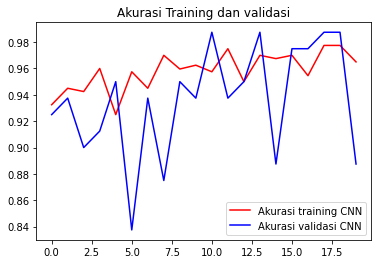

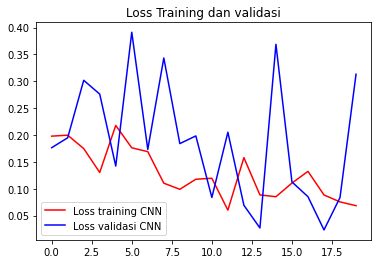

<Figure size 432x288 with 0 Axes>

In [14]:
Train_acc = CNN.history['accuracy']
Val_acc = CNN.history['val_accuracy']
Train_loss = CNN.history['loss']
Val_loss = CNN.history['val_loss']

epoch = range(len(Train_acc))

plt.plot(epoch, Train_acc, 'r', label='Akurasi training CNN')
plt.plot(epoch, Val_acc, 'b', label='Akurasi validasi CNN')
plt.title('Akurasi Training dan validasi')
plt.legend(loc=0)
plt.figure()

plt.plot(epoch, Train_loss, 'r', label='Loss training CNN')
plt.plot(epoch, Val_loss, 'b', label='Loss validasi CNN')
plt.title('Loss Training dan validasi')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving download.png to download.png
download.png
[[1. 0. 0.]]
paper


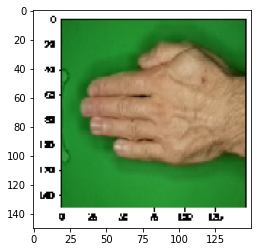

In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  label = np.argmax(classes)
  if label==0:
    print('paper')
  elif label==1:
    print('rock')
  elif label==2:
    print('scissors')